**Copyright, Stella Etim, June/July, 2024. All rights reserved**






# **The prefix "se" which are the  initials for Stella Etim will be combined with some of the variable names**

In [ ]:
#importing necessary libraries used in the project
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
# Mounting of the Google Drive
drive.mount('/content/drive', force_remount=True)

# Navigate to dataset folder in Google Drive
os.chdir('/content/drive/MyDrive/Stella MSC  Project')

Mounted at /content/drive


In [ ]:
#load the dataset
se_movie = pd.read_csv(r"movie_metadata.csv")

In [ ]:
se_movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
#shows the movie information
se_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
#shows the size of the dataframe
se_movie.shape

(5043, 28)

**Data Cleaning and Preprocessing Steps**

In [ ]:
# check for missing values in the dataframe
se_movie.isna().sum()


,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
#drop all null values in the dataframe
se_cleaned_movie = se_movie.dropna()
se_cleaned_movie.shape

(3755, 28)

In [ ]:
#showws information for numeric features
se_cleaned_movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3.755000e+03,3.755000e+03,3755.000000,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,167.392277,110.260186,807.463648,771.484953,7753.390146,5.262614e+07,1.058489e+05,11530.158988,1.377630,336.914514,4.624810e+07,2002.974434,2022.314248,6.464740,2.110951,9349.396272
std,123.465521,22.649332,3068.570417,1894.460316,15520.897163,7.032249e+07,1.520496e+05,19123.805685,2.041689,411.258897,2.260393e+08,9.888558,4545.393731,1.055865,0.353093,21464.027749
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.500000,745.000000,8.301882e+06,1.966300e+04,1920.500000,0.000000,110.000000,1.000000e+07,1999.000000,385.000000,5.900000,1.850000,0.000000
50%,139.000000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397700e+04,4060.000000,1.000000,210.000000,2.500000e+07,2004.000000,686.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.690181e+07,1.286110e+05,16243.000000,2.000000,398.500000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [ ]:
#list datatypes for categorical features, using index to retrieve names of columns
se_categorical_col = se_cleaned_movie.dtypes[se_cleaned_movie.dtypes == "object"].index

print(se_categorical_col)

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')


In [ ]:
#obtain information for categorical features
se_cleaned_movie[se_categorical_col].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Victor Frankenstein,Steve Coogan,halloween|masked killer|michael myers|slasher|...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700


In [ ]:
# Drop all unnecessary features
se_cleaned_movie = se_cleaned_movie.drop(columns=[
    'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',
    'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
    'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link', 'budget',
    'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes', 'color', 'language', 'num_user_for_reviews'
    ])


In [ ]:
#standardise the year column
se_cleaned_movie['title_year'] = se_cleaned_movie['title_year'].astype(int)

#standardise the  duration column
se_cleaned_movie['duration'] = se_cleaned_movie['duration'].astype(int)

In [ ]:
# Rearrange the selected features
ordered = ['movie_title','genres', 'content_rating','country', 'title_year',
          'duration','actor_1_name', 'actor_2_name','director_name', 'imdb_score', 'plot_keywords']


se_cleaned_movie = se_cleaned_movie[ordered]


# using the string replace method to replace the underscore in feature name
se_cleaned_movie.columns = se_cleaned_movie.columns.str.replace('_', ' ')




In [ ]:
# checking the reaaranged dataframe
se_cleaned_movie.head()

,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,PG-13,USA,2009,178,CCH Pounder,Joel David Moore,James Cameron,7.9,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,PG-13,USA,2007,169,Johnny Depp,Orlando Bloom,Gore Verbinski,7.1,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,Action|Adventure|Thriller,PG-13,UK,2015,148,Christoph Waltz,Rory Kinnear,Sam Mendes,6.8,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,Action|Thriller,PG-13,USA,2012,164,Tom Hardy,Christian Bale,Christopher Nolan,8.5,deception|imprisonment|lawlessness|police offi...
5,John Carter,Action|Adventure|Sci-Fi,PG-13,USA,2012,132,Daryl Sabara,Samantha Morton,Andrew Stanton,6.6,alien|american civil war|male nipple|mars|prin...


In [ ]:
# Check for  all the duplicated values
se_cleaned_movie.duplicated().sum()


100

In [ ]:
# Drop all duplicated values
se_cleaned_movie = se_cleaned_movie.drop_duplicates()


In [ ]:
# confirming that duplicated values are dropped
se_cleaned_movie.duplicated().sum()


0

In [ ]:
#checking the shape of cleaned dataframe
se_cleaned_movie.shape

(3655, 11)

In [ ]:
# Resetting the DataFrame index in a sequential order and drop old index
se_cleaned_movie.reset_index(drop=True, inplace=True)

# Verifying changes by displaying the last 5 rows
se_cleaned_movie.tail()


,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords
3650,Clean,Drama|Music|Romance,R,France,2004,110,Maggie Cheung,Béatrice Dalle,Olivier Assayas,6.9,jail|junkie|money|motel|singer
3651,The Circle,Drama,Not Rated,Iran,2000,90,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Jafar Panahi,7.5,abortion|bus|hospital|prison|prostitution
3652,Primer,Drama|Sci-Fi|Thriller,PG-13,USA,2004,77,Shane Carruth,David Sullivan,Shane Carruth,7.0,changing the future|independent film|invention...
3653,El Mariachi,Action|Crime|Drama|Romance|Thriller,R,USA,1992,81,Carlos Gallardo,Peter Marquardt,Robert Rodriguez,6.9,assassin|death|guitar|gun|mariachi
3654,My Date with Drew,Documentary,PG,USA,2004,90,John August,Brian Herzlinger,Jon Gunn,6.6,actress name in title|crush|date|four word tit...


In [ ]:
#checking the value counts for movies per year
se_cleaned_movie['title year'].value_counts()

,count
title year,
2002,185
2006,185
2008,180
2005,177
2009,176
...,...
1961,1
1927,1
1960,1


In [ ]:
# get the unique values for the content rating

se_cleaned_movie['content rating'].value_counts()


,count
content rating,
R,1664
PG-13,1259
PG,551
G,87
Not Rated,34
Unrated,22
Approved,17
X,9
NC-17,6


**Group Ratings Explanations**
1. G(General Audience): suitable for every age.
2. PG(Parental Guidance): not all content are suitable for children and requires supervision.
3. TV-G(General Audience - Tv): just like G ratings but in Tv shows.
4. PG-13(Parents Strongly Cautioned): suitable for teenagers and needs supervision for some content.
5. TV-PG(Parental Guidance- TV): similar to PG rated movies.
6. R(Restricted): recommended for viewers over 17.
7. NC- 17(Adults only): strongly suitable for Adults only.
8. X (Explicit): has Adult contents
9. Approved: suitable for everyone
10. Not Rated / Unrated: has not been assigned a rating
11. Passed: used in earlier times and similar to approved.
12. GP (General Patronage): similar to PG
13. M (Mature Audience): suitable for teenagers but need supervision
14. TV-14 (Parents strongly cautioned - TV): suitable for viewers over 14 and need supervision.





In [ ]:
# Definition of content ratings map dictionary
se_group_ratings = {
    'R': 'Adult',
    'PG-13': 'Teen',
    'PG': 'Family',
    'G': 'Family',
    'Not Rated': 'Unrated',
    'Approved': 'Teen',
    'X': 'Adult',
    'Passed': 'Unrated',
    'NC-17': 'Adult',
    'GP': 'Teen',
    'M': 'Teen',
    'TV-14': 'Teen',
    'TV-G': 'Family',
    'TV-PG': 'Teen'
}

# Mapping all content ratings into their specific groups
se_cleaned_movie['group content rating'] = se_cleaned_movie['content rating'].map(se_group_ratings)

# Dropping all rows with the 'Unrated' category
se_cleaned_movie = se_cleaned_movie[se_cleaned_movie['group content rating'] != 'Unrated'].copy()

# Defining the ordinal mapping for the group content rating
se_ordinal_mapping = {
    'Family': 1,
    'Teen': 2,
    'Adult': 3
}

# Applying the mappings to the group content ratings using .loc to avoid SettingWithCopyWarning
se_cleaned_movie.loc[:, 'ordinal content rating'] = se_cleaned_movie['group content rating'].map(se_ordinal_mapping)

# Drop rows where 'ordinal content rating' has NaN values
se_cleaned_movie = se_cleaned_movie.dropna(subset=['ordinal content rating'])

# Ensuring that there are no NaN values remaining in 'ordinal content rating'
se_missing_values_count = se_cleaned_movie['ordinal content rating'].isna().sum()
print("The number of null values in 'ordinal content rating':", se_missing_values_count)


The number of null values in 'ordinal content rating': 0


In [ ]:
#Check the counts of combined genre in the dataframe
se_cleaned_movie['genres'].value_counts()

,count
genres,
Comedy|Drama|Romance,142
Comedy,136
Comedy|Drama,134
Comedy|Romance,130
Drama,129
...,...
Comedy|Drama|Thriller,1
Adventure|Crime|Drama|Western,1
Action|Adventure|Comedy|Drama|War,1


In [ ]:
#split and convert genre strings to a list
se_cleaned_movie['genres'] = se_cleaned_movie['genres'].str.split('|')


#initialise the Multilabelbinarizer to enable the funtionalities used
mlb  = MultiLabelBinarizer()


# one-hot encoding used for the genre column
se_encoded_genres = mlb.fit_transform(se_cleaned_movie['genres'])


#create a dataframe using encoded genres
se_df_genres = pd.DataFrame(se_encoded_genres, columns=mlb.classes_, index=se_cleaned_movie.index)


#join the encoded genres dataframe and initial dataframe
se_cleaned_movie = pd.concat([se_cleaned_movie, se_df_genres], axis = 1)


#display all columns in full
pd.set_option('display.max_columns', None)


# display the first 5 rows to confirm changes made
se_cleaned_movie.head()



,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords,group content rating,ordinal content rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",PG-13,USA,2009,178,CCH Pounder,Joel David Moore,James Cameron,7.9,avatar|future|marine|native|paraplegic,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",PG-13,USA,2007,169,Johnny Depp,Orlando Bloom,Gore Verbinski,7.1,goddess|marriage ceremony|marriage proposal|pi...,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,"[Action, Adventure, Thriller]",PG-13,UK,2015,148,Christoph Waltz,Rory Kinnear,Sam Mendes,6.8,bomb|espionage|sequel|spy|terrorist,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,"[Action, Thriller]",PG-13,USA,2012,164,Tom Hardy,Christian Bale,Christopher Nolan,8.5,deception|imprisonment|lawlessness|police offi...,Teen,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,John Carter,"[Action, Adventure, Sci-Fi]",PG-13,USA,2012,132,Daryl Sabara,Samantha Morton,Andrew Stanton,6.6,alien|american civil war|male nipple|mars|prin...,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**For the one-hot encoding, when each movie belongs to a particular genre, it shows a binary number for  1 which indicates true and 0 for False**

In [ ]:
# genres are extracted from each row
se_check_genres = se_cleaned_movie.explode('genres')

In [ ]:
#obtain movie counts for each genre
se_check_genres = se_check_genres['genres'].value_counts()


# Converting Series to DataFrame
se_check_genres_df = se_check_genres.reset_index()
se_check_genres_df.columns = ['genres', 'count']

# Display entire DataFrame
se_check_genres

,count
genres,
Drama,1810
Comedy,1425
Thriller,1066
Action,921
Romance,823
Adventure,749
Crime,682
Fantasy,481
Sci-Fi,477


In [ ]:
#count total number of genres
len(se_check_genres)

21

In [ ]:
#verifying the number of rows and columns
se_cleaned_movie.shape

(3596, 34)

**EXPLORATORY DATA ANALYSIS**


In [ ]:
# check movie with the highest IMDb score
se_highest_rated_movie = se_cleaned_movie.loc[se_cleaned_movie['imdb score'].idxmax()]

# Display details of movie dataframe
print(se_highest_rated_movie[['movie title', 'imdb score', 'title year']])


movie title    The Shawshank Redemption 
imdb score                           9.3
title year                          1994
Name: 1784, dtype: object


In [ ]:
# check the movie with the lowest IMDb score
se_lowest_rated_movie = se_cleaned_movie.loc[se_cleaned_movie['imdb score'].idxmin()]

# Display details of movie dataframe
print(se_lowest_rated_movie[['movie title', 'imdb score', 'title year']])


movie title    Justin Bieber: Never Say Never 
imdb score                                 1.6
title year                                2011
Name: 2505, dtype: object


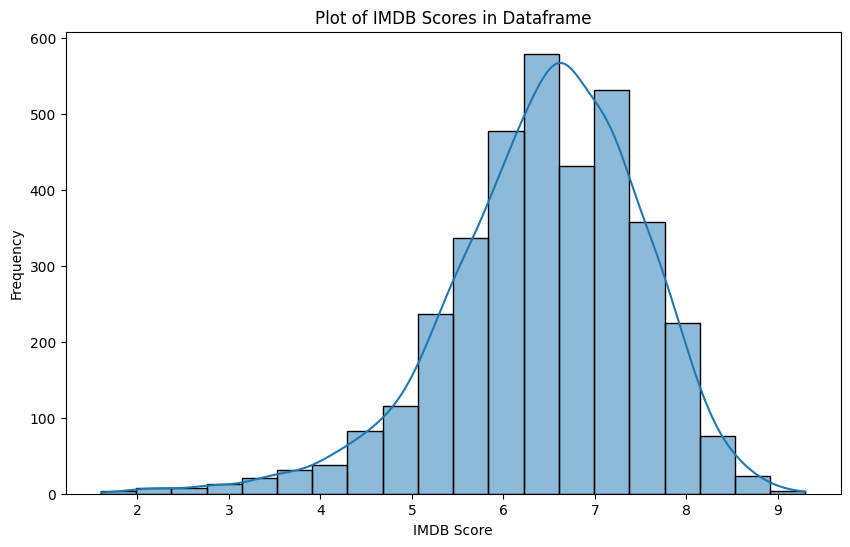

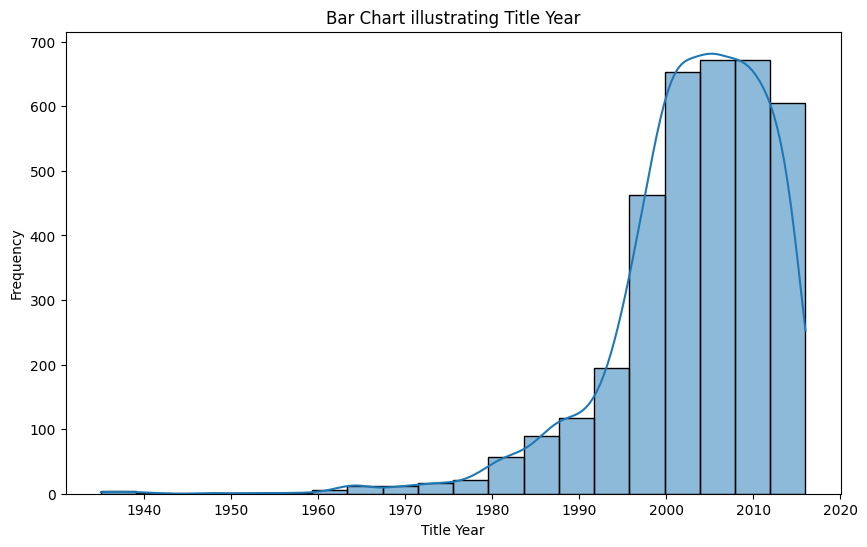

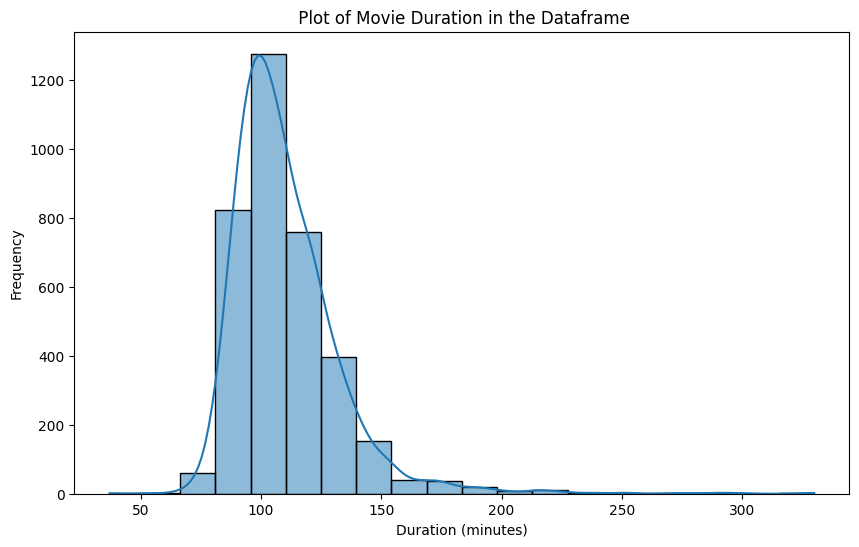

In [ ]:
# Imdb_score plot in the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(se_cleaned_movie['imdb score'], bins=20, kde=True)
plt.title('Plot of IMDB Scores in Dataframe')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

# The title_year plot
plt.figure(figsize=(10, 6))
sns.histplot(se_cleaned_movie['title year'], bins=20, kde=True)
plt.title('Bar Chart illustrating Title Year')
plt.xlabel('Title Year')
plt.ylabel('Frequency')
plt.show()

# The duration distribution across the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(se_cleaned_movie['duration'], bins=20, kde=True)
plt.title(' Plot of Movie Duration in the Dataframe')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


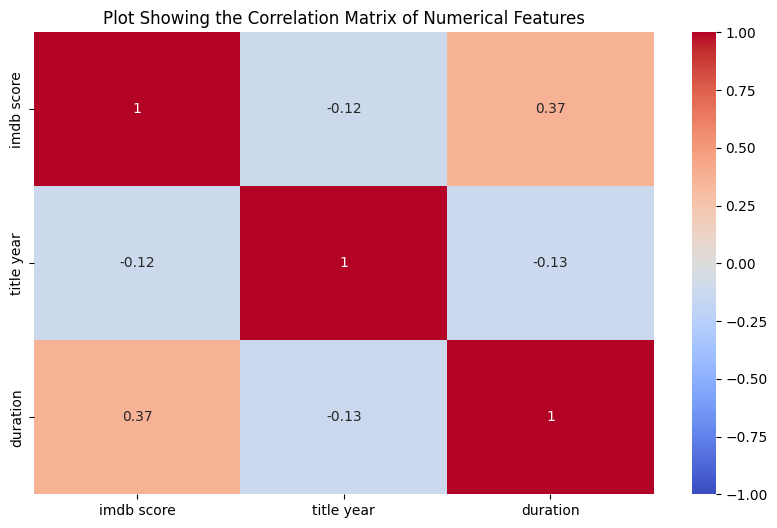

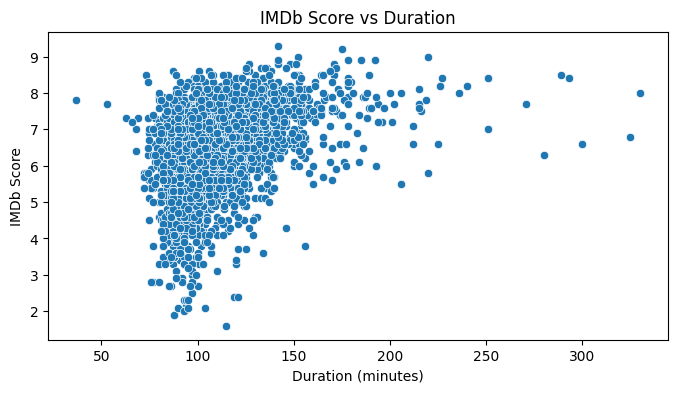

In [ ]:
# The Correlation matrix of numerical features
plt.figure(figsize=(10, 6))
corr_matrix = se_cleaned_movie[['imdb score', 'title year', 'duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Plot Showing the Correlation Matrix of Numerical Features')
plt.show()

# Scatter plot between IMDB score and duration
plt.figure(figsize=(8, 4))
sns.scatterplot(data=se_cleaned_movie, x='duration', y='imdb score')
plt.title('IMDb Score vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Score')
plt.show()


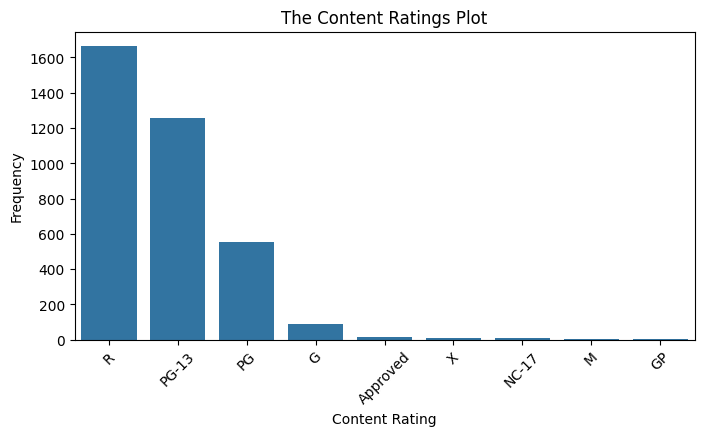

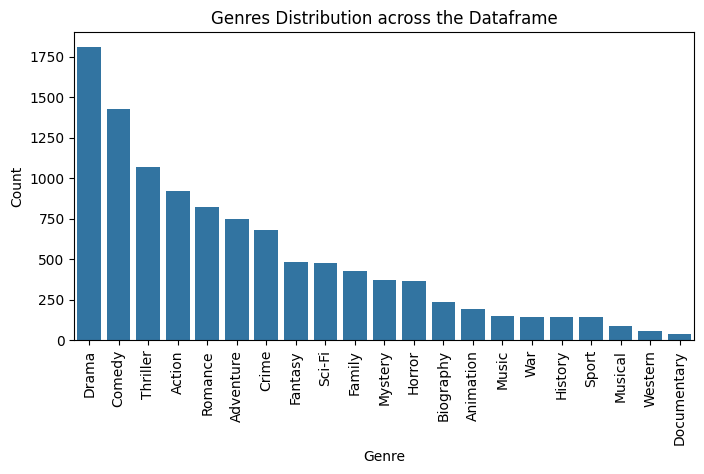

In [ ]:
# Distribution of content rating
plt.figure(figsize=(8, 4))
sns.countplot(data=se_cleaned_movie, x='content rating', order=se_cleaned_movie['content rating'].value_counts().index)
plt.title('The Content Ratings Plot')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Distribution of genres
plt.figure(figsize=(8, 4))
sns.barplot(data=se_check_genres_df, x='genres', y='count', order=se_check_genres_df['genres'])
plt.title('Genres Distribution across the Dataframe')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

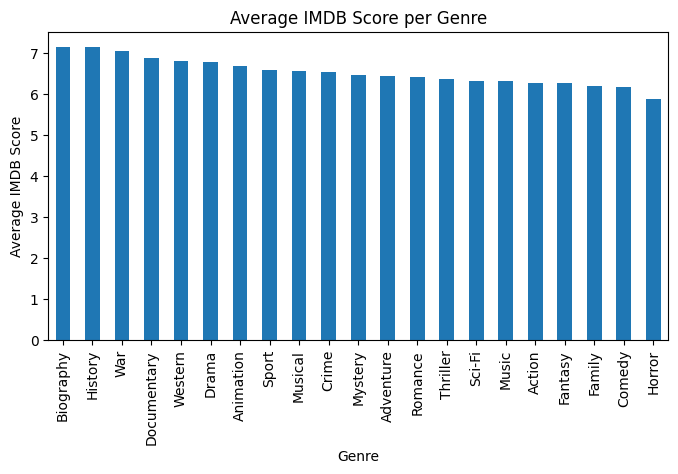

In [ ]:
# Average IMDB score per genre
avg_imdb_per_genre = se_cleaned_movie.explode('genres').groupby('genres')['imdb score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
avg_imdb_per_genre.plot(kind='bar')
plt.title('Average IMDB Score per Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=90)
plt.show()


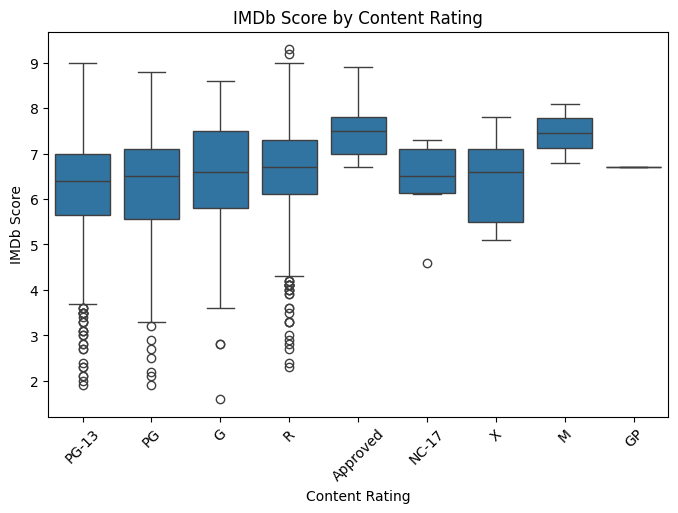

In [ ]:
# IMDB score by content rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=se_cleaned_movie, x='content rating', y='imdb score')
plt.title('IMDb Score by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()


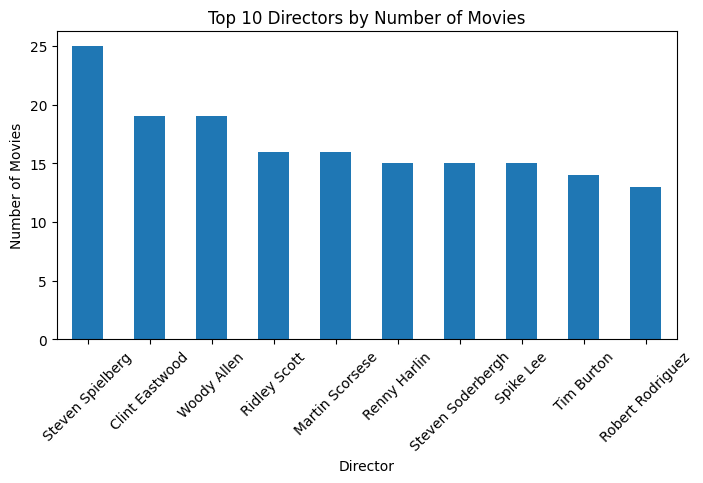

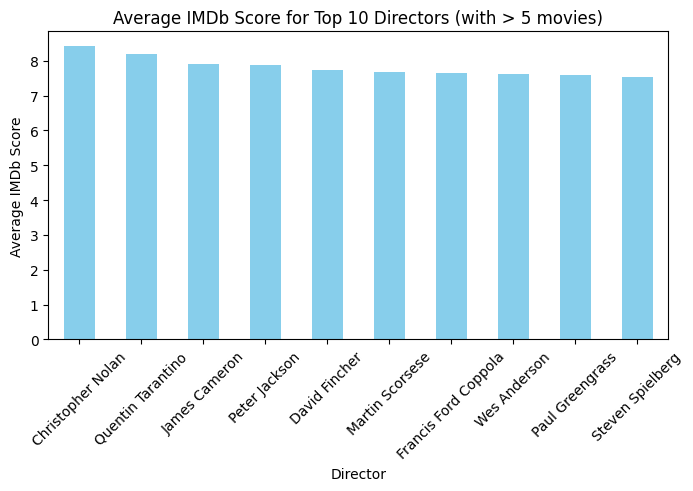

In [ ]:
# count of highest occuring movies by  Directors
se_top_10_directors_count = se_cleaned_movie['director name'].value_counts().head(10)

plt.figure(figsize=(8, 4))
se_top_10_directors_count.plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Calculate the average IMDb score for each director (directors that have more
# than 5 movies)

se_avg_imdb_per_director = se_cleaned_movie.groupby('director name').filter(lambda x: len(x) > 5).groupby('director name')['imdb score'].mean().sort_values(ascending=False)

# choose the top 10 directors
top_10_directors_avg_score = se_avg_imdb_per_director.head(10)

# Plot the directors with highest movie count by average IMDb score
plt.figure(figsize=(8, 4))
top_10_directors_avg_score.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Score for Top 10 Directors (with > 5 movies)')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()


**1. To Analyse Genre distribution across various content ratings**

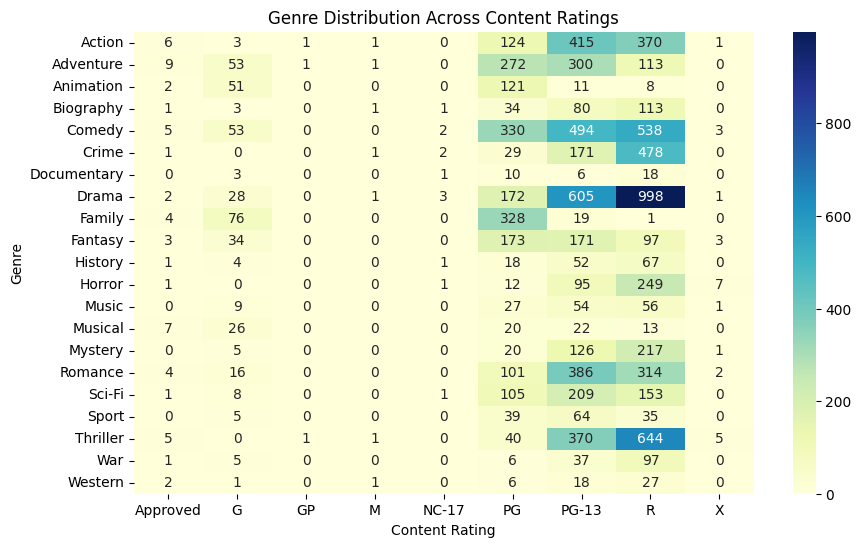

In [ ]:
# Get encoded genre lists and unique content ratings from the dataframe
se_encoded_genre_column = se_df_genres.columns

#Summary table of genres by content rating
se_counts_genre = se_cleaned_movie.groupby('content rating')[se_encoded_genre_column].sum().reset_index()

#Reshapes the  dataframe to plot using seaborn
se_counts_genre_melt = se_counts_genre.melt(id_vars='content rating', var_name='genres', value_name='count')

#Plot the Heatmap to show count of each genre per content rating

plt.figure(figsize=(10, 6))
sns.heatmap(se_counts_genre.set_index('content rating').T, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Genre Distribution Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Genre')
plt.show()


**Key Observations From the Heatmap:**



Title: Genre Distributions Across content ratings
X- axis: This shows all the content ratings
Y-axis: it represents the genre of movies with its count)

1. From the Heatmap, Genre has the highest count in the R rated movies dominated by genres like Drama(998), Thriller(644) and Comedy(538)

2. PG-13 has the second highest number of movies with dominance of the Drama(605), Comedy(494) and Action(415).

In conclusion, Drama has the most occurence in R and PG- 13 ratings.
Family and Comedy has the most occurence in the least restrcitive ratings like PG.

**2. Genre Comparison Across the years**

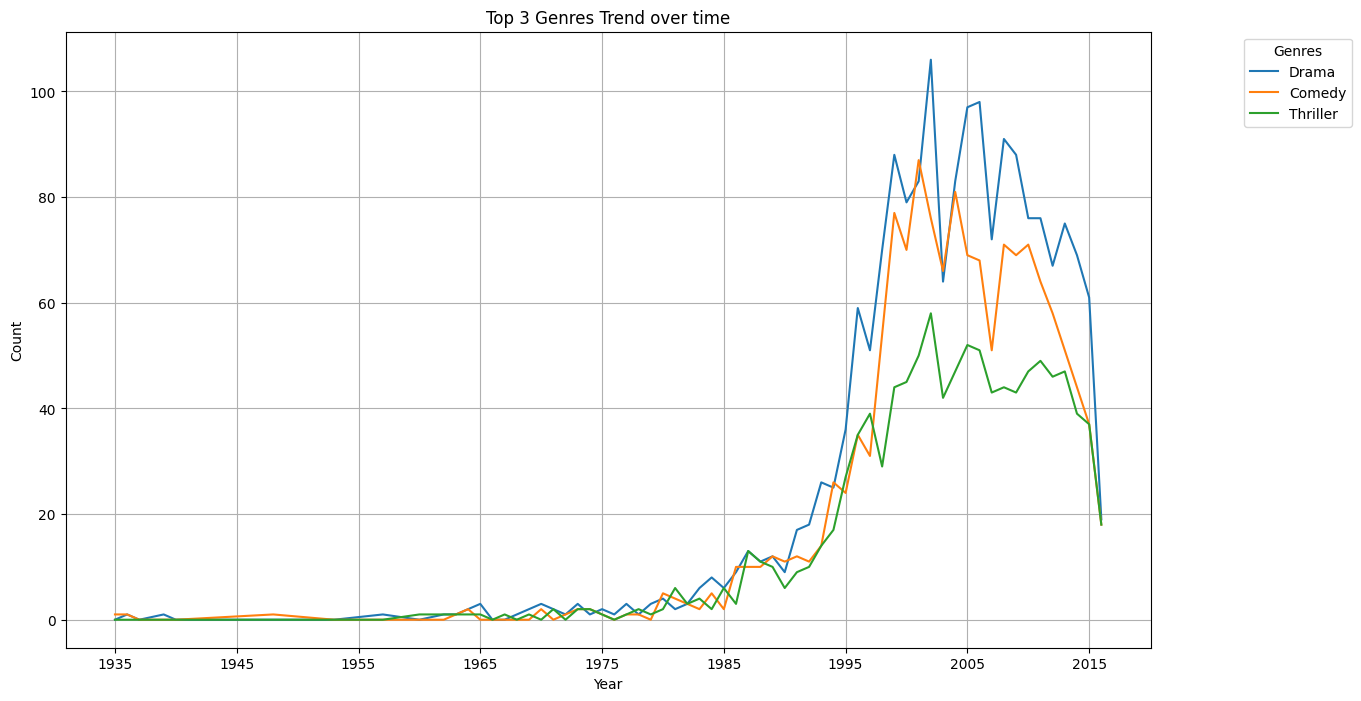

In [ ]:
#the total count of each genre in descending order
se_total_counts_of_genre = se_cleaned_movie[se_encoded_genre_column].sum().sort_values(ascending = False)

#identify top 3 genres
se_top_3_genres = se_total_counts_of_genre.head(3).index
se_top_3_genres

#group data by genre and year
se_counts_of_genre_year = se_cleaned_movie.groupby('title year')[se_encoded_genre_column].sum()

#plot the genre trends over time
plt.figure(figsize=(14,8))
for genre in se_top_3_genres:
  plt.plot(se_counts_of_genre_year.index, se_counts_of_genre_year[genre], label = genre)

plt.xticks(ticks=range(int(se_counts_of_genre_year.index.min()), 2023, 10))
plt.title('Top 3 Genres Trend over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title= 'Genres', bbox_to_anchor =(1.08,1), loc = 'upper left')
plt.grid(True)
plt.show()

**Key Points**

Drama has always been consistent in production with a noticeable peak in the 1990's followed by comedy with similar peak followed by thriller with a much smaller rise.

There are signigicant rise and falls from the middle 1990's which could be as a result of market saturation or change in viewers preference.




# **Analysis of content rating distribution across the years**

>



<Figure size 600x400 with 0 Axes>

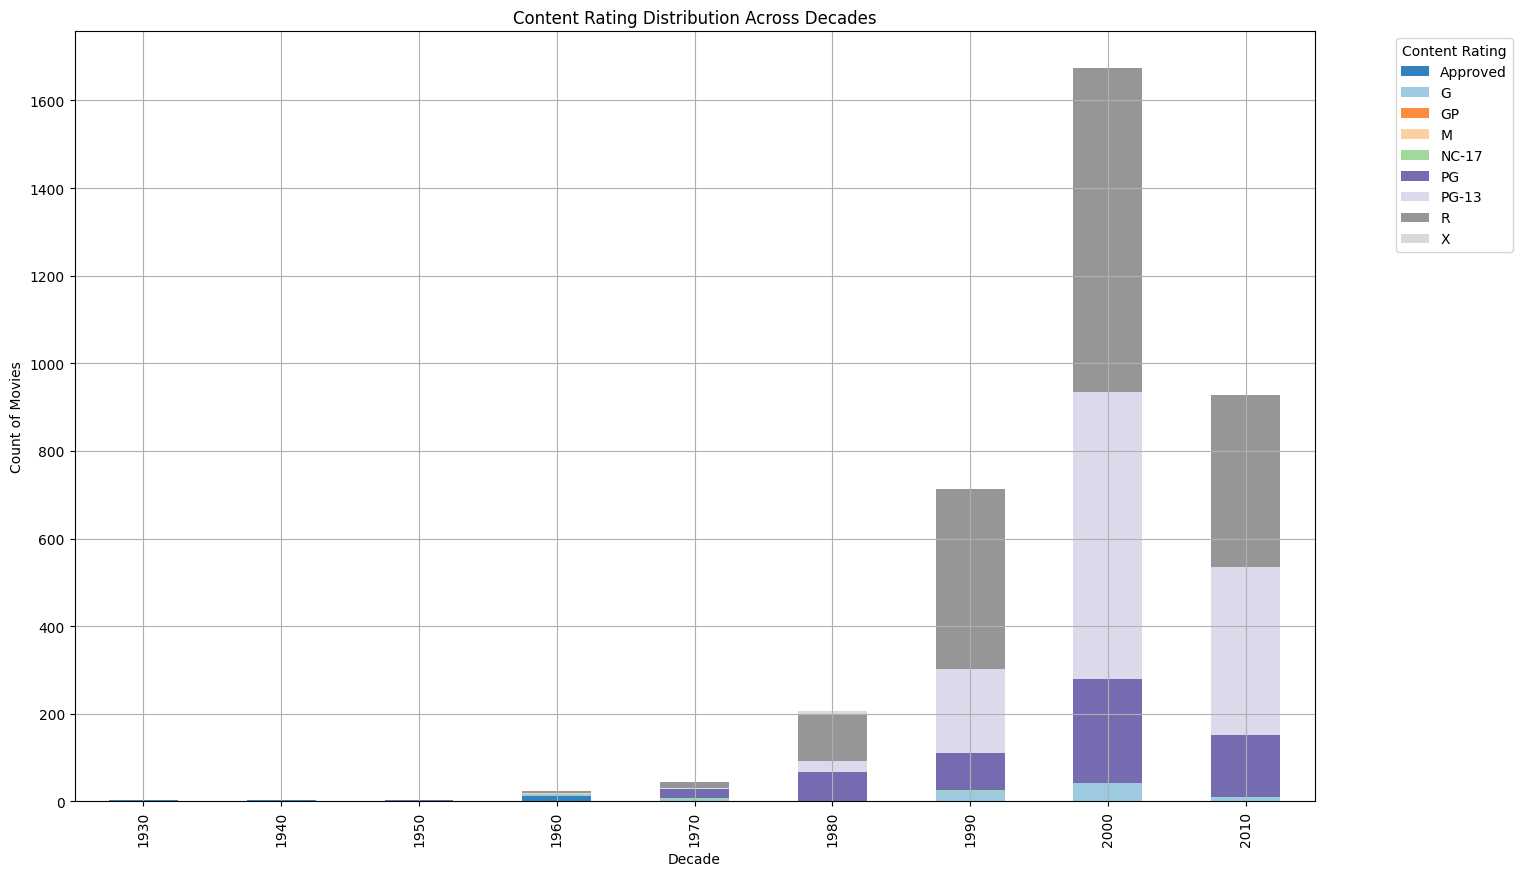

In [ ]:
# Create a new column for decades
se_cleaned_movie['decade'] = (se_cleaned_movie['title year'] // 10) * 10

# Group by decade and content rating
se_content_rating_by_decade = se_cleaned_movie.groupby(['decade', 'content rating']).size().reset_index(name='count')

# Pivot the data to make plot easier
se_content_rating_pivot = se_content_rating_by_decade.pivot(index='decade', columns='content rating', values='count').fillna(0)

# Plot content ratings across decades
plt.figure(figsize=(6, 4))
se_content_rating_pivot.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(16, 10))
plt.title('Content Rating Distribution Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count of Movies')
plt.legend(title='Content Rating', bbox_to_anchor=(1.06, 1), loc='upper left')
plt.grid(True)
plt.show()

 plot above shows content distribution across decades.

**Key Observations**

1. It is noticeable that there is a significant rise in movies produced across decades especially with a peak in the early 2000s and a drastic drop in the decade of 2010 and above which could be attributed to global finacial crisis that must have had an impact of movie budgets or the fact that there is a surge in the production of streaming platforms or perhaps the focus on producing high quality big budget movies

2. Also, in recent years, productions of movies for Teenagers and Adults has increased, which shows the rise in PG-13 and R rated movies. Whereas in the 1970's and below, movies were catered for mostly family viewings.





In [ ]:
# select top 5 actors from 'actor 1 name'
se_top_actors_1 = se_cleaned_movie['actor 1 name'].value_counts().head(5)

se_top_actors_1

,count
actor 1 name,
Robert De Niro,42
Johnny Depp,34
Nicolas Cage,30
Denzel Washington,29
J.K. Simmons,29


In [ ]:
# Select top 5 actors from 'actor 2 name'
se_top_actors_2 = se_cleaned_movie['actor 2 name'].value_counts().head(5)

se_top_actors_2

,count
actor 2 name,
Morgan Freeman,18
Charlize Theron,13
Brad Pitt,13
Meryl Streep,10
James Franco,10


<Figure size 1000x600 with 0 Axes>

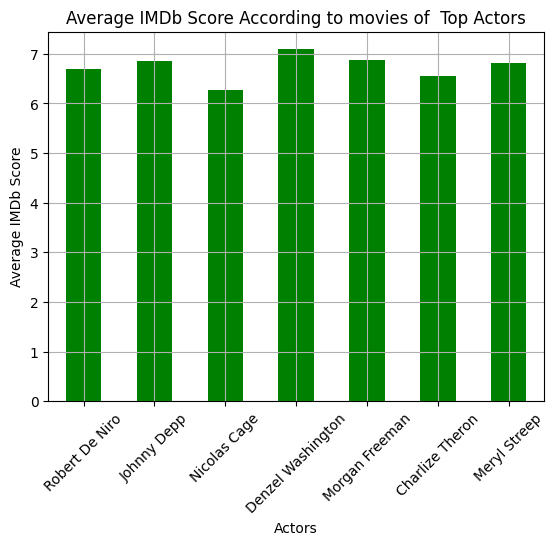

In [ ]:
# Combination of top actors from both columns and their unique values
se_top_actors_combined = pd.concat([se_top_actors_1, se_top_actors_2]).drop_duplicates().head(7)

# Filtering movies according to top unique actors
se_top_actor_movies = se_cleaned_movie[se_cleaned_movie['actor 1 name'].isin(se_top_actors_combined.index) | se_cleaned_movie['actor 2 name'].isin(se_top_actors_combined.index)]

# Calculate average IMDb score for each top actor
se_actor_imdb_scores = {}
for actor in se_top_actors_combined.index:
    se_actor_movies = se_top_actor_movies[(se_top_actor_movies['actor 1 name'] == actor) | (se_top_actor_movies['actor 2 name'] == actor)]
    se_actor_imdb_scores[actor] = se_actor_movies['imdb score'].mean()

# Convert to a DataFrame to plot
se_actor_imdb_df = pd.DataFrame(list(se_actor_imdb_scores.items()), columns=['Actor', 'Average IMDb Score'])

# Plot the average imdb  for top actors
plt.figure(figsize=(10, 6))
se_actor_imdb_df.set_index('Actor').plot(kind='bar', color='green', legend=False)
plt.title('Average IMDb Score According to movies of  Top Actors')
plt.xlabel('Actors')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Key Observations**

1. Robert De Niro appeared in the most movies totalling 42 movies in the cleaned dataset but the average imdb score reaching almost 7.0 which shows he has contributed to acting in mosts of the highly rated movies over time.

2. Denzel Washington on the other hand has the highest average imdb scores despite the fact that he didn't appear the most in the movie dataset. This shows that the total number of movie appearance does not directly influence the average imdb score.



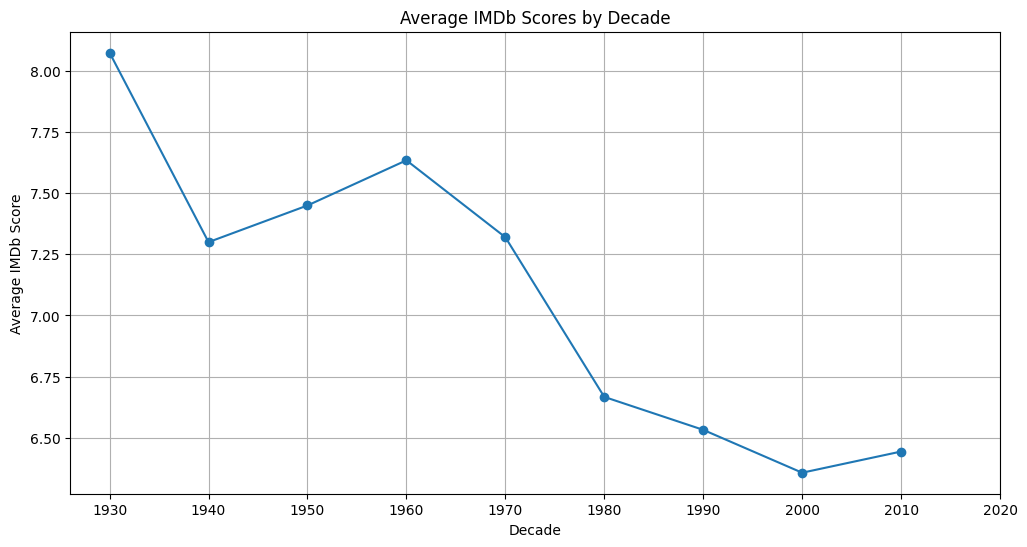

In [ ]:
# Creation of decade column
se_cleaned_movie['decade'] = (se_cleaned_movie['title year'] // 10) * 10

# Filtering the data for movies up to 2016
se_filtered_movies = se_cleaned_movie[se_cleaned_movie['title year'] <= 2016]

# Calculation of average IMDb score per decade
se_decade_imdb_avg = se_filtered_movies.groupby('decade')['imdb score'].mean().reset_index()

#confirms if any movies are from 2010, then join missing average imdb score
if not (se_decade_imdb_avg['decade'] == 2010).any():
    se_decade_2010s = se_cleaned_movie[se_cleaned_movie['title year'] >= 2010]['imdb score'].mean()
    se_decade_imdb_avg = se_decade_imdb_avg.append({'decade': 2010, 'imdb score': se_decade_2010s}, ignore_index=True)


# Plot the average IMDb scores by decade
plt.figure(figsize=(12, 6))
plt.plot(se_decade_imdb_avg['decade'], se_decade_imdb_avg['imdb score'], marker='o', linestyle='-')
plt.xticks(list(se_decade_imdb_avg['decade']) + [2020])  # Includes decade up to 2020 in the x-axis
plt.title('Average IMDb Scores by Decade')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

**Key Observations**

from 1930s - 1950s, the average IMDb scores were at its highest, which shows that movies produced around this time were highly rated.

from 1960s onwards  it kept on declining which may be due to:

1. the changing of rating style, or advancement of technology which may have improved the digital filming but not improving the originality or story telling and that could lead to a decline in ratings.

2. the fact that audience expectations have increased which means that the viewers are more critical and selective now

In [ ]:
se_cleaned_movie.head()

,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords,group content rating,ordinal content rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,decade
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",PG-13,USA,2009,178,CCH Pounder,Joel David Moore,James Cameron,7.9,avatar|future|marine|native|paraplegic,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2000
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",PG-13,USA,2007,169,Johnny Depp,Orlando Bloom,Gore Verbinski,7.1,goddess|marriage ceremony|marriage proposal|pi...,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2000
2,Spectre,"[Action, Adventure, Thriller]",PG-13,UK,2015,148,Christoph Waltz,Rory Kinnear,Sam Mendes,6.8,bomb|espionage|sequel|spy|terrorist,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
3,The Dark Knight Rises,"[Action, Thriller]",PG-13,USA,2012,164,Tom Hardy,Christian Bale,Christopher Nolan,8.5,deception|imprisonment|lawlessness|police offi...,Teen,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
4,John Carter,"[Action, Adventure, Sci-Fi]",PG-13,USA,2012,132,Daryl Sabara,Samantha Morton,Andrew Stanton,6.6,alien|american civil war|male nipple|mars|prin...,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010


**MODELLING**

**Preprocessing Text Data**

In [ ]:
#creating a function to remove space from names of actors and directors to  avoid common names being captured twice
def no_space(words):
  return words.replace(" ", "")

se_cleaned_movie['actor 1 name'] = se_cleaned_movie['actor 1 name'].apply(no_space)
se_cleaned_movie['actor 2 name'] = se_cleaned_movie['actor 2 name'].apply(no_space)
se_cleaned_movie['director name'] = se_cleaned_movie['director name'].apply(no_space)

se_cleaned_movie.head()


,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords,group content rating,ordinal content rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,decade
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",PG-13,USA,2009,178,CCHPounder,JoelDavidMoore,JamesCameron,7.9,avatar|future|marine|native|paraplegic,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2000
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",PG-13,USA,2007,169,JohnnyDepp,OrlandoBloom,GoreVerbinski,7.1,goddess|marriage ceremony|marriage proposal|pi...,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2000
2,Spectre,"[Action, Adventure, Thriller]",PG-13,UK,2015,148,ChristophWaltz,RoryKinnear,SamMendes,6.8,bomb|espionage|sequel|spy|terrorist,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
3,The Dark Knight Rises,"[Action, Thriller]",PG-13,USA,2012,164,TomHardy,ChristianBale,ChristopherNolan,8.5,deception|imprisonment|lawlessness|police offi...,Teen,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
4,John Carter,"[Action, Adventure, Sci-Fi]",PG-13,USA,2012,132,DarylSabara,SamanthaMorton,AndrewStanton,6.6,alien|american civil war|male nipple|mars|prin...,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010


In [ ]:
#using the apply method to clean and remove characters and converts word characters to lowercase
se_cleaned_movie['plot keywords'] = se_cleaned_movie['plot keywords'].apply(
    lambda x: [re.sub(r'[^\w\s ]', '',keyword).lower() for keyword in x.split('|')] if pd.notnull(x) else []
)


#transforms all list of keywords into a single string format for each movie
se_cleaned_movie['plot keywords'] = se_cleaned_movie['plot keywords'].apply(lambda x: ' '.join(x))

se_cleaned_movie.head()

,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords,group content rating,ordinal content rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,decade
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",PG-13,USA,2009,178,CCHPounder,JoelDavidMoore,JamesCameron,7.9,avatar future marine native paraplegic,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2000
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",PG-13,USA,2007,169,JohnnyDepp,OrlandoBloom,GoreVerbinski,7.1,goddess marriage ceremony marriage proposal pi...,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2000
2,Spectre,"[Action, Adventure, Thriller]",PG-13,UK,2015,148,ChristophWaltz,RoryKinnear,SamMendes,6.8,bomb espionage sequel spy terrorist,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
3,The Dark Knight Rises,"[Action, Thriller]",PG-13,USA,2012,164,TomHardy,ChristianBale,ChristopherNolan,8.5,deception imprisonment lawlessness police offi...,Teen,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
4,John Carter,"[Action, Adventure, Sci-Fi]",PG-13,USA,2012,132,DarylSabara,SamanthaMorton,AndrewStanton,6.6,alien american civil war male nipple mars prin...,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010


In [ ]:
#importing all libraries needed for stemming

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

#initiate the Stemmer
stemmer = PorterStemmer()

#create a function for Stemming words
def se_stem_txt(text):
  se_token_word = word_tokenize(text.lower())
  se_stemmed_token = [stemmer.stem(token) for token in se_token_word if token.isalpha()]
  return ' '.join(se_stemmed_token)


#applying stem function to the plot keyword
se_cleaned_movie['plot keywords'] = se_cleaned_movie['plot keywords'].apply(se_stem_txt)

se_cleaned_movie

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,movie title,genres,content rating,country,title year,duration,actor 1 name,actor 2 name,director name,imdb score,plot keywords,group content rating,ordinal content rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,decade
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",PG-13,USA,2009,178,CCHPounder,JoelDavidMoore,JamesCameron,7.9,avatar futur marin nativ parapleg,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2000
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",PG-13,USA,2007,169,JohnnyDepp,OrlandoBloom,GoreVerbinski,7.1,goddess marriag ceremoni marriag propos pirat ...,Teen,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2000
2,Spectre,"[Action, Adventure, Thriller]",PG-13,UK,2015,148,ChristophWaltz,RoryKinnear,SamMendes,6.8,bomb espionag sequel spi terrorist,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
3,The Dark Knight Rises,"[Action, Thriller]",PG-13,USA,2012,164,TomHardy,ChristianBale,ChristopherNolan,8.5,decept imprison lawless polic offic terrorist ...,Teen,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010
4,John Carter,"[Action, Adventure, Sci-Fi]",PG-13,USA,2012,132,DarylSabara,SamanthaMorton,AndrewStanton,6.6,alien american civil war male nippl mar princess,Teen,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,Pink Flamingos,"[Comedy, Crime, Horror]",NC-17,USA,1972,108,Divine,MinkStole,JohnWaters,6.1,absurd humor egg gross out humor lesbian sex,Adult,3.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1970
3650,Clean,"[Drama, Music, Romance]",R,France,2004,110,MaggieCheung,BéatriceDalle,OlivierAssayas,6.9,jail junki money motel singer,Adult,3.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2000
3652,Primer,"[Drama, Sci-Fi, Thriller]",PG-13,USA,2004,77,ShaneCarruth,DavidSullivan,ShaneCarruth,7.0,chang the futur independ film invent nonlinear...,Teen,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2000
3653,El Mariachi,"[Action, Crime, Drama, Romance, Thriller]",R,USA,1992,81,CarlosGallardo,PeterMarquardt,RobertRodriguez,6.9,assassin death guitar gun mariachi,Adult,3.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1990


In [ ]:
# Normalise the movie titles in the dataset
se_cleaned_movie['movie title'] = se_cleaned_movie['movie title'].str.strip().str.lower()


**Combining Relevant Features**

In [ ]:
#join all the text features and one-hot encoded genres into one
def joint_features(row, se_txt_features, se_genre_features):
  se_txt_combined = ' '.join(row[se_txt_features])
  se_genre_combined = ' '.join([str(row[genres]) for genres in se_genre_features])
  return se_txt_combined + ' ' + se_genre_combined

#this shows all texts features that will be joined
se_txt_features = ['plot keywords', 'director name', 'actor 1 name', 'actor 2 name']

#this shows a list of separated genres
se_encoded_genre_column =  ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']

#join the text features and genre features together
se_cleaned_movie['joint features'] = se_cleaned_movie.apply(lambda row: joint_features(row, se_txt_features, se_encoded_genre_column), axis =1)

se_cleaned_movie['joint features'].head()



,joint features
0,avatar futur marin nativ parapleg JamesCameron...
1,goddess marriag ceremoni marriag propos pirat ...
2,bomb espionag sequel spi terrorist SamMendes C...
3,decept imprison lawless polic offic terrorist ...
4,alien american civil war male nippl mar prince...


**TF-IDF with Cosine Similarity**

In [ ]:
# Import the essential libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise the TF-IDF Vectorizer
se_tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 3))


# Vectorize the 'joint features' column
se_tfidf_matrix = se_tfidf_vectorizer.fit_transform(se_cleaned_movie['joint features'])


# computing cosine similarity matrix
cosine_sim = cosine_similarity(se_tfidf_matrix, se_tfidf_matrix)


# Display the shape of the TF-IDF matrix
print(f" The TF-IDF matrix shape is: {se_tfidf_matrix.shape}")


 The TF-IDF matrix shape is: (3596, 5000)


In [ ]:
# Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity

# Computing the cosine_similarity matrix
cosine_sim = cosine_similarity(se_tfidf_matrix, se_tfidf_matrix)

# Display the shape of the cosine similarity matrix
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")


Cosine similarity matrix shape: (3596, 3596)


In [ ]:
pip install fuzzywuzzy


In [ ]:
from fuzzywuzzy import process


# Function to obtain 10 most similar movies with fuzzy matching for given movie title
def se_get_top_10_recommendations_fuzzy(movie_title, cosine_sim, df, n=10):
    # Normalising movie title
    movie_title = movie_title.strip().lower()

    # Fuzzy match to select matching title
    best_match = process.extractOne(movie_title, df['movie title'].values)
    print(f" This is the Best match for '{movie_title}': {best_match}")
    if best_match is None or best_match[1] < 70:  # Confidence threshold
        print(f"Movie '{movie_title}'is not found in the dataset.")
        return pd.DataFrame(columns=['movie title', 'similarity score'])

    best_match_title = best_match[0]
    idx = df[df['movie title'] == best_match_title].index
    print(f"Index for best match '{best_match_title}': {idx}")
    if len(idx) == 0:
        print(f"Index for movie '{best_match_title}' is not found.")
        return pd.DataFrame(columns=['movie title', 'similarity score'])

    idx = idx[0]

    # check for pairwise similarity scores for the entire movies
    se_simil_scores = list(enumerate(cosine_sim[idx]))
    print(f"Similarity scores: {se_simil_scores[:5]}")  # Print first 5 similarity scores for debugging

    # Arrange movies according to similarity scores
    se_simil_scores = sorted(se_simil_scores, key=lambda x: x[1], reverse=True)

    # obtain scores of top 10 movies that are similar
    se_simil_scores = se_simil_scores[1:n+1]

    # Get the movie indices and similarity scores
    se_movie_indices = [i[0] for i in se_simil_scores]
    se_similarity_scores = [i[1] for i in se_simil_scores]
    print(f"Top {n} movie indices: {se_movie_indices}")
    print(f"Top {n} similarity scores: {se_similarity_scores}")

    # Creating a DataFrame with the results
    recommendations = df.iloc[se_movie_indices][['movie title']].copy()
    recommendations['similarity score'] = se_similarity_scores

    return recommendations

# Example of selected movie
se_example_title = 'spider man'
se_recommendations_fuzzy = se_get_top_10_recommendations_fuzzy(se_example_title, cosine_sim, se_cleaned_movie, n=10)
print(se_recommendations_fuzzy)


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


 This is the Best match for 'spider man': ('spider-man', 100)
Index for best match 'spider-man': Index([155], dtype='int64')
Similarity scores: [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Top 10 movie indices: [5, 30, 20, 1567, 2553, 3518, 934, 2795, 1468, 1529]
Top 10 similarity scores: [0.8309242294954937, 0.46589566479742345, 0.4545893180374293, 0.4031411751170416, 0.22830049377549808, 0.22032366206918955, 0.20759322489319834, 0.19063427842240332, 0.16919281933334568, 0.1576337296205016]
                                 movie title  similarity score
5                               spider-man 3          0.830924
30                              spider-man 2          0.465896
20                    the amazing spider-man          0.454589
1567                     eight legged freaks          0.403141
2559  the crocodile hunter: collision course          0.228300
3559                  kingdom of the spiders          0.220324
934                     for love of the game          0.

**Evaluation of the TF-IDF Model**

In [ ]:
#Setting Ground Truth for the Models
def get_ground_truth_indices(df, movie_title):
    movie_title_normalized = movie_title.strip().lower()
    df['normalized_title'] = df['movie title'].str.strip().str.lower()

    matching_movie = df[df['normalized_title'] == movie_title_normalized]
    if matching_movie.empty:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    movie = matching_movie.iloc[0]
    similar_movies = df[(df['genres'].apply(lambda x: bool(set(x) & set(movie['genres']))) &
                         ((df['director name'] == movie['director name']) |
                          (df['actor 1 name'] == movie['actor 1 name']) |
                          (df['actor 2 name'] == movie['actor 2 name']) |
                          (df['plot keywords'].apply(lambda x: bool(set(x.split()) & set(movie['plot keywords'].split()))))))].index.tolist()
    return similar_movies


**Evaluation metrics used are the Mean Reciprocal Rank(MRR), Discounted Cumulative Gain(DCG) and Normalised Discounted Cumulative Gain(NDCG)**

In [ ]:

# Function to calculate MRR
def mean_reciprocal_rank(recommended_indices, ground_truth_indices):
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            return 1 / rank
    return 0

# Function to calculate DCG
def discounted_cumulative_gain(recommended_indices, ground_truth_indices):
    dcg = 0.0
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            dcg += 1 / np.log2(rank + 1)
    return dcg

In [ ]:

# Function to evaluate recommendations
def evaluate_recommendations(df, movie_title, cosine_sim, n=10):
    recommendations = se_get_top_10_recommendations_fuzzy(movie_title, cosine_sim, df, n)
    if recommendations.empty:
        print(f"No recommendations found for '{movie_title}'.")
        return 0, 0

    recommended_indices = recommendations.index.tolist()
    ground_truth_indices = get_ground_truth_indices(df, movie_title)

    if not ground_truth_indices:
        print(f"No ground truth found for '{movie_title}'.")
        return 0, 0

    mrr = mean_reciprocal_rank(recommended_indices, ground_truth_indices)
    dcg = discounted_cumulative_gain(recommended_indices, ground_truth_indices)

    print(f"Evaluating recommendations for '{movie_title}':")
    print("Recommended movies:", recommendations['movie title'].tolist())
    print("Ground truth indices:", ground_truth_indices)
    print("MRR:", mrr)
    print("DCG:", dcg)
    print("\n")

    return mrr, dcg

**MRR and DCG evaluation result for TF-IDF with Cosine Similarity**

In [ ]:
# Example titles for evaluation
example_titles = [  'avatar',  'spider-man']

mrr_list = []
dcg_list = []

for title in example_titles:
    mrr, dcg = evaluate_recommendations(se_cleaned_movie, title, cosine_sim, n=10)
    mrr_list.append(mrr)
    dcg_list.append(dcg)

# Calculate average MRR and DCG
avg_mrr = np.mean(mrr_list)
avg_dcg = np.mean(dcg_list)

print(f"Average MRR: {avg_mrr}")
print(f"Average DCG: {avg_dcg}")

 This is the Best match for 'avatar': ('avatar', 100)
Index for best match 'avatar': Index([0], dtype='int64')
Similarity scores: [(0, 1.0000000000000002), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]
Top 10 movie indices: [273, 2229, 3355, 1926, 3018, 1810, 2383, 1579, 567, 2610]
Top 10 similarity scores: [0.2511246861830817, 0.22751566721100291, 0.21084457920050126, 0.19264036819645877, 0.18738686880668798, 0.17617018269630444, 0.16988385890313126, 0.16910697544787753, 0.16820850672451218, 0.1647590072793482]
Evaluating recommendations for 'avatar':
Recommended movies: ['terminator 2: judgment day', 'aliens', 'smoke signals', 'robocop 3', 'the terminator', 'shark night 3d', 'the marine', 'the new world', 'battle los angeles', 'tales from the crypt: demon knight']
Ground truth indices: [0, 43, 74, 91, 104, 119, 134, 154, 172, 231, 254, 269, 273, 276, 290, 294, 295, 305, 356, 413, 463, 567, 572, 642, 705, 717, 829, 976, 1227, 1228, 1230, 1231, 1246, 1301, 1348, 1452, 1502, 1631, 1883, 1927,

**NDCG result for TF-IDF with Cosine Similarity**

In [ ]:
import numpy as np

# Function to calculate DCG
def dcg(scores):
    return sum([rel / np.log2(idx + 2) for idx, rel in enumerate(scores)])

# Function to calculate Ideal DCG
def ideal_dcg(n):
    return sum([1 / np.log2(i + 2) for i in range(n)])

# Function to calculate NDCG
def ndcg(actual_scores, n):
    actual_dcg = dcg(actual_scores)
    idcg = ideal_dcg(n)
    return actual_dcg / idcg if idcg > 0 else 0

# Function to calculate relevance scores
def get_relevance_scores(recommended_indices, ground_truth_indices):
    return [1 if idx in ground_truth_indices else 0 for idx in recommended_indices]

# Example data for Avatar
recommended_indices_avatar = [273, 2229, 3355, 1926, 3018, 1810, 2383, 1579, 567, 2610]
ground_truth_indices_avatar = [0, 43, 74, 91, 104, 119, 134, 154, 172, 231, 254, 269, 273, 276, 290, 294, 295, 305, 356, 413, 463, 567, 572, 642, 705, 717, 829, 976, 1227, 1228, 1230, 1231, 1246, 1301, 1348, 1452, 1502, 1631, 1883, 1927, 1995, 2133, 2221, 2230, 2385, 2616, 2629, 2839, 2881, 2996, 3030, 3355, 3364, 3652]

# Calculate relevance scores for the recommended movies
relevance_scores_avatar = get_relevance_scores(recommended_indices_avatar, ground_truth_indices_avatar)

# Calculate NDCG for Avatar
n = len(recommended_indices_avatar)
ndcg_avatar = ndcg(relevance_scores_avatar, n)
print(f"NDCG for Avatar: {ndcg_avatar}")

# Example data for Spider-Man
recommended_indices_spiderman = [5, 30, 20, 1567, 2553, 3518, 934, 2795, 1468, 1529]
ground_truth_indices_spiderman = [5, 7, 9, 15, 16, 20, 26, 30, 37, 63, 79, 86, 96, 104, 111, 148, 155, 171, 192, 193, 246, 260, 324, 333, 372, 383, 408, 411, 484, 487, 491, 497, 540, 602, 634, 708, 711, 719, 724, 727, 788, 794, 796, 825, 836, 843, 909, 934, 1050, 1063, 1138, 1142, 1150, 1159, 1173, 1215, 1223, 1262, 1362, 1379, 1395, 1436, 1449, 1468, 1499, 1524, 1556, 1567, 1655, 1707, 1716, 1758, 1765, 1772, 1839, 1897, 1924, 1933, 1970, 1995, 2107, 2130, 2261, 2295, 2384, 2423, 2456, 2534, 2559, 2636, 2644, 2685, 2751, 2782, 2848, 2902, 2945, 2951, 2952, 3053, 3061, 3176, 3271, 3272, 3304, 3310, 3357, 3392, 3518]

# Calculate relevance scores for the recommended movies
relevance_scores_spiderman = get_relevance_scores(recommended_indices_spiderman, ground_truth_indices_spiderman)

# Calculate NDCG for Spider-Man
n = len(recommended_indices_spiderman)
ndcg_spiderman = ndcg(relevance_scores_spiderman, n)
print(f"NDCG for Spider-Man: {ndcg_spiderman}")

# Calculate average NDCG
average_ndcg = (ndcg_avatar + ndcg_spiderman) / 2
print(f"Average NDCG: {average_ndcg}")


NDCG for Avatar: 0.3963918729015093
NDCG for Spider-Man: 0.78180487222265
Average NDCG: 0.5890983725620796


In [ ]:

def ideal_dcg(n):
    return sum([1 / np.log2(i + 2) for i in range(n)])

# Calculate Ideal DCG for top 10 positions
ideal_dcg_10 = ideal_dcg(10)
print(f"Highest possible DCG for top 10 positions: {ideal_dcg_10}")


Highest possible DCG for top 10 positions: 4.543559338088346


In [ ]:
se_cleaned_movie.shape

(3596, 37)

**Count Vectorizer with Cosine Similarity**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer model
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 3))


# Fit and transform the combined text features
count_matrix = count_vectorizer.fit_transform(se_cleaned_movie['joint features'])


# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(count_matrix, count_matrix)



**Get Recommendation Function for Countvectorizer with Cosine Similarity**

In [ ]:
def get_top_n_recommendations_fuzzy(movie_title, cosine_sim, df, n=10):
    # Normalize the input movie title
    movie_title = movie_title.strip().lower()

    # Fuzzy match to find the best match in the DataFrame
    best_match = process.extractOne(movie_title, df['movie title'].values)
    if best_match is None or best_match[1] < 70:  # Confidence threshold
        print(f"Movie '{movie_title}' not found in the dataset.")
        return pd.DataFrame(columns=['movie title', 'similarity score'])

    best_match_title = best_match[0]
    idx = df[df['movie title'] == best_match_title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    se_simil_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    se_simil_scores = sorted(se_simil_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top 10 most similar movies
    se_simil_scores = se_simil_scores[1:n+1]

    # extract the movie indices and similarity scores
    se_movie_indices = [i[0] for i in se_simil_scores]
    similarity_scores = [i[1] for i in se_simil_scores]

    # Create a copy version of DataFrame to avoid settingswithcopy warning for the results
    recommendations = df.iloc[se_movie_indices][['movie title']].copy()
    recommendations['similarity score'] = similarity_scores

    return recommendations

# Example usage
example_title = 'spider man'
recommendations_fuzzy = get_top_n_recommendations_fuzzy(example_title, cosine_sim_matrix, se_cleaned_movie, n=10)
print(recommendations_fuzzy)


                                 movie title  similarity score
5                               spider-man 3          0.816497
20                    the amazing spider-man          0.466667
30                              spider-man 2          0.429669
1567                     eight legged freaks          0.390360
2559  the crocodile hunter: collision course          0.230940
3559                  kingdom of the spiders          0.210819
934                     for love of the game          0.207020
2802                                  spider          0.195180
1529                         drag me to hell          0.182574
192                                 megamind          0.172133


**Evaluating the performance of Countvectorizer with Cosine Similarity**




In [ ]:
def get_ground_truth_indices(df, movie_title):
    movie_title_normalised = movie_title.strip().lower()
    df['normalised_title'] = df['movie title'].str.strip().str.lower()

    matching_movie = df[df['normalised_title'] == movie_title_normalised]
    if matching_movie.empty:
        print(f"Movie '{movie_title}'is not found in the dataset.")
        return []

    movie = matching_movie.iloc[0]
    genre_columns = [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                                                          'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
                                                          'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Sport',
                                                          'Thriller', 'War', 'Western']]
    print(f"Movie genres for '{movie_title}':", movie[genre_columns].values)

    similar_movies = df[(df[genre_columns].apply(lambda x: (x & movie[genre_columns]).sum(), axis=1) > 0)].index.tolist()
    print(f"Similar movies found for '{movie_title}':", similar_movies)

    return similar_movies

def mean_reciprocal_rank(recommended_indices, ground_truth_indices):
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            return 1 / rank
    return 0

def discounted_cumulative_gain(recommended_indices, ground_truth_indices):
    dcg = 0.0
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            dcg += 1 / np.log2(rank + 1)
    return dcg

def ndcg(relevance_scores, n):
    actual_dcg = discounted_cumulative_gain(relevance_scores, range(n))
    ideal_dcg = discounted_cumulative_gain(range(n), range(n))
    return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

def evaluate_recommendations(df, movie_title, cosine_sim, n=10):
    recommendations = get_top_n_recommendations_fuzzy(movie_title, cosine_sim, df, n)
    if recommendations.empty:
        print(f"No recommendations found for '{movie_title}'.")
        return 0, 0, 0

    recommended_indices = recommendations.index.tolist()
    ground_truth_indices = get_ground_truth_indices(df, movie_title)

    if not ground_truth_indices:
        print(f"No ground truth found for '{movie_title}'.")
        return 0, 0, 0

    mrr = mean_reciprocal_rank(recommended_indices, ground_truth_indices)
    dcg = discounted_cumulative_gain(recommended_indices, ground_truth_indices)
    relevance_scores = [1 if idx in ground_truth_indices else 0 for idx in recommended_indices]
    ndcg_score = ndcg(relevance_scores, n)

    print(f"Evaluating recommendations for '{movie_title}':")
    print("Recommended movies:", recommendations['movie title'].tolist())
    print("Ground truth indices:", ground_truth_indices)
    print("MRR:", mrr)
    print("DCG:", dcg)
    print("NDCG:", ndcg_score)
    print("\n")

    return mrr, dcg, ndcg_score

# Example of movies for evaluation
example_titles = ['avatar', 'spider-man']

mrr_list = []
dcg_list = []
ndcg_list = []

for title in example_titles:
    mrr, dcg, ndcg_score = evaluate_recommendations(se_cleaned_movie, title, cosine_sim_matrix, n=10)
    mrr_list.append(mrr)
    dcg_list.append(dcg)
    ndcg_list.append(ndcg_score)

print(f"Average MRR: {np.mean(mrr_list)}")
print(f"Average DCG: {np.mean(dcg_list)}")
print(f"Average NDCG: {np.mean(ndcg_list)}")


Movie genres for 'avatar': [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
Similar movies found for 'avatar': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 2

In [ ]:
import numpy as np

# Function to calculate DCG
def dcg(scores):
    return sum([rel / np.log2(idx + 2) for idx, rel in enumerate(scores)])

# Function to calculate Ideal DCG
def ideal_dcg(n):
    return sum([1 / np.log2(i + 2) for i in range(n)])

# Function to calculate NDCG
def ndcg(actual_scores, n):
    actual_dcg = dcg(actual_scores)
    idcg = ideal_dcg(n)
    return actual_dcg / idcg if idcg > 0 else 0

# Function to calculate relevance scores
def get_relevance_scores(recommended_indices, ground_truth_indices):
    return [1 if idx in ground_truth_indices else 0 for idx in recommended_indices]

# Function to get ground truth indices
def get_ground_truth_indices(df, movie_title):
    movie_title_normalized = movie_title.strip().lower()
    df['normalized_title'] = df['movie title'].str.strip().str.lower()

    matching_movie = df[df['normalized_title'] == movie_title_normalized]
    if matching_movie.empty:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    movie = matching_movie.iloc[0]
    genre_columns = [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                                                          'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
                                                          'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Sport',
                                                          'Thriller', 'War', 'Western']]

    similar_movies = df[(df[genre_columns].apply(lambda x: (x & movie[genre_columns]).sum(), axis=1) > 0)].index.tolist()

    return similar_movies

# Function to evaluate recommendations
def evaluate_recommendations(df, movie_title, cosine_sim, n=10):
    recommendations = get_top_n_recommendations_fuzzy(movie_title, cosine_sim, df, n)
    if recommendations.empty:
        print(f"No recommendations found for '{movie_title}'.")
        return 0, 0, 0

    recommended_indices = recommendations.index.tolist()
    ground_truth_indices = get_ground_truth_indices(df, movie_title)

    if not ground_truth_indices:
        print(f"No ground truth found for '{movie_title}'.")
        return 0, 0, 0

    relevance_scores = get_relevance_scores(recommended_indices, ground_truth_indices)
    ndcg_score = ndcg(relevance_scores, n)

    print(f"Evaluating recommendations for '{movie_title}':")
    print("Recommended movies:", recommendations['movie title'].tolist())
    print("Ground truth indices:", ground_truth_indices)
    print("Relevance scores:", relevance_scores)
    print("NDCG:", ndcg_score)
    print("\n")

    return ndcg_score

# Example titles for evaluation
example_titles = ['avatar', 'spider-man']

ndcg_list = []

for title in example_titles:
    ndcg_score = evaluate_recommendations(se_cleaned_movie, title, cosine_sim_matrix, n=10)
    ndcg_list.append(ndcg_score)

print(f"Average NDCG: {np.mean(ndcg_list)}")


Evaluating recommendations for 'avatar':
Recommended movies: ['terminator 2: judgment day', 'repo men', 'the terminator', 'aliens', 'sunshine', 'the marine', 'smoke signals', 'waterworld', 'windtalkers', 'battle los angeles']
Ground truth indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176,

**KNN with Cosine Similarity**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 3))

# Fit and transform the 'joint features' column
tfidf_matrix = tfidf_vectorizer.fit_transform(se_cleaned_movie['joint features'])



In [ ]:
se_parameter_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 30, 40, 50]
}


In [ ]:
se_best_score = 0
se_best_parameter = {}

for n_neighbors in se_parameter_grid['n_neighbors']:
    for algorithm in se_parameter_grid['algorithm']:
        for leaf_size in se_parameter_grid['leaf_size']:
            knn_model = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors, algorithm=algorithm, leaf_size=leaf_size)
            knn_model.fit(tfidf_matrix)
            #  evaluate the model based on an internal metric, like the average distance of neighbors for a sample
            distances, _ = knn_model.kneighbors(tfidf_matrix, n_neighbors=n_neighbors)
            score = distances.mean()

            if score > se_best_score:
                se_best_score = score
                best_params = {
                    'n_neighbors': n_neighbors,
                    'algorithm': algorithm,
                    'leaf_size': leaf_size
                }

print("Best Parameters: ", best_params)


Best Parameters:  {'n_neighbors': 20, 'algorithm': 'auto', 'leaf_size': 20}


In [ ]:

#  Train the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='auto')
knn_model.fit(tfidf_matrix)


NearestNeighbors(metric='cosine')

In [ ]:
from fuzzywuzzy import process

def se_get_top_10_recommendations_knn(movie_title, knn_model, df, tfidf_matrix, n=10):
    # Normalising the example movie title
    movie_title = movie_title.strip().lower()

    # Fuzzy match to find the best movie match
    best_match = process.extractOne(movie_title, df['movie title'].values)
    if best_match is None or best_match[1] < 70:  # Confidence threshold
        print(f"Movie '{movie_title}' not found in the dataset.")
        return pd.DataFrame(columns=['movie title', 'similarity score'])

    best_match_title = best_match[0]
    idx = df[df['movie title'] == best_match_title].index[0]

    # Get the diststance and movie indices of the nearest neighbors
    distances, indices = knn_model.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)

    # Skip the first one as it is the movie itself
    distances = distances.flatten()[1:]
    indices = indices.flatten()[1:]

    # Get the movie titles and similarity scores
    recommendations = df.iloc[indices][['movie title']].copy()
    recommendations['similarity score'] = 1 - distances  # convert distance to cosine similarity

    return recommendations

# Example usage
example_title = 'spider man'
recommendations_knn = se_get_top_10_recommendations_knn(example_title, knn_model, se_cleaned_movie, tfidf_matrix, n=10)
print(recommendations_knn)


                                 movie title  similarity score
5                               spider-man 3          0.830924
30                              spider-man 2          0.465896
20                    the amazing spider-man          0.454589
1567                     eight legged freaks          0.403141
2559  the crocodile hunter: collision course          0.228300
3559                  kingdom of the spiders          0.220324
934                     for love of the game          0.207593
2802                                  spider          0.190634
1468                           arachnophobia          0.169193
1529                         drag me to hell          0.157634


In [ ]:
def get_ground_truth_indices(df, movie_title):
    movie_title_normalized = movie_title.strip().lower()
    df['normalized_title'] = df['movie title'].str.strip().str.lower()

    matching_movie = df[df['normalized_title'] == movie_title_normalized]
    if matching_movie.empty:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    movie = matching_movie.iloc[0]
    genre_columns = [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                                                          'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
                                                          'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Sport',
                                                          'Thriller', 'War', 'Western']]
    print(f"Movie genres for '{movie_title}':", movie[genre_columns].values)

    similar_movies = df[(df[genre_columns].apply(lambda x: (x & movie[genre_columns]).sum(), axis=1) > 0)].index.tolist()
    print(f"Similar movies found for '{movie_title}':", similar_movies)

    return similar_movies

def mean_reciprocal_rank(recommended_indices, ground_truth_indices):
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            return 1 / rank
    return 0

def discounted_cumulative_gain(recommended_indices, ground_truth_indices):
    dcg = 0.0
    for rank, index in enumerate(recommended_indices, start=1):
        if index in ground_truth_indices:
            dcg += 1 / np.log2(rank + 1)
    return dcg

def ndcg(relevance_scores, n):
    actual_dcg = discounted_cumulative_gain(relevance_scores, range(n))
    ideal_dcg = discounted_cumulative_gain(range(n), range(n))
    return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0


In [ ]:
def evaluate_recommendations(df, movie_title, knn_model, tfidf_matrix, n=10):
    recommendations = se_get_top_10_recommendations_knn(movie_title, knn_model, df, tfidf_matrix, n)
    if recommendations.empty:
        print(f"No recommendations found for '{movie_title}'.")
        return 0, 0, 0

    recommended_indices = df[df['movie title'].isin(recommendations['movie title'])].index.tolist()
    ground_truth_indices = get_ground_truth_indices(df, movie_title)

    if not ground_truth_indices:
        print(f"No ground truth found for '{movie_title}'.")
        return 0, 0, 0

    mrr = mean_reciprocal_rank(recommended_indices, ground_truth_indices)
    dcg = discounted_cumulative_gain(recommended_indices, ground_truth_indices)
    relevance_scores = [1 if idx in ground_truth_indices else 0 for idx in recommended_indices]
    ndcg_score = ndcg(relevance_scores, n)

    print(f"Evaluating recommendations for '{movie_title}':")
    print("Recommended movies:", recommendations['movie title'].tolist())
    print("Ground truth indices:", ground_truth_indices)
    print("MRR:", mrr)
    print("DCG:", dcg)
    print("NDCG:", ndcg_score)
    print("\n")

    return mrr, dcg, ndcg_score

# Example titles for evaluation
example_titles = ['avatar', 'spider-man']

mrr_list = []
dcg_list = []
ndcg_list = []

for title in example_titles:
    mrr, dcg, ndcg_score = evaluate_recommendations(se_cleaned_movie, title, knn_model, tfidf_matrix, n=10)
    mrr_list.append(mrr)
    dcg_list.append(dcg)
    ndcg_list.append(ndcg_score)

print(f"Average MRR: {np.mean(mrr_list)}")
print(f"Average DCG: {np.mean(dcg_list)}")
print(f"Average NDCG: {np.mean(ndcg_list)}")


Movie genres for 'avatar': [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
Similar movies found for 'avatar': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 2

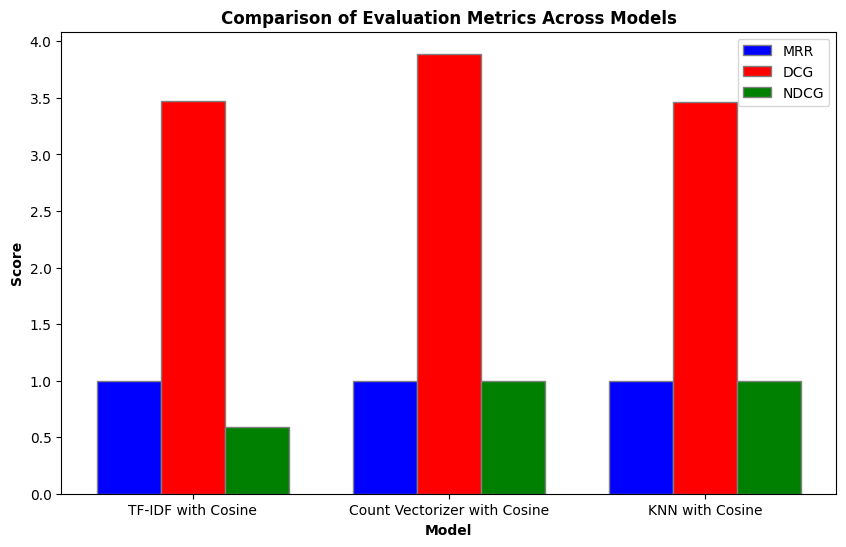

In [ ]:

# results from evaluation
se_models = ['TF-IDF with Cosine', 'Count Vectorizer with Cosine', 'KNN with Cosine']
mrr_scores = [1.0, 1.0, 1.0]
dcg_scores = [3.47, 3.89, 3.46]
ndcg_scores = [0.59, 1.0, 1.0]

# the width of bars
se_bars_width = 0.25

# Bar positioning on the x-axis
r1 = np.arange(len(se_models))
r2 = [x + se_bars_width for x in r1]
r3 = [x + se_bars_width for x in r2]

# Plot of bars
plt.figure(figsize=(10, 6))
plt.bar(r1, mrr_scores, color='b', width=se_bars_width, edgecolor='grey', label='MRR')
plt.bar(r2, dcg_scores, color='r', width=se_bars_width, edgecolor='grey', label='DCG')
plt.bar(r3, ndcg_scores, color='g', width=se_bars_width, edgecolor='grey', label='NDCG')

# Add all labels
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + se_bars_width for r in range(len(se_models))], se_models)
plt.ylabel('Score', fontweight='bold')
plt.title('Comparison of Evaluation Metrics Across Models', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pickle

pickle.dump(count_vectorizer, open("count vectorizer", "wb"))
pickle.dump( cosine_sim_matrix , open ("similar", "wb"))



In [ ]:
pickle.dump(se_cleaned_movie ,open ("movies", "wb"))